## Libraries & Data loading

In [34]:
import numpy as np 
import pandas as pd 
from scipy import stats 
data= pd.read_csv(r"C:\Users\sairam\Desktop\data science\datasets\breast cancer coimbra dataset.csv")
data.head()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,1
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,1
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,1
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,1
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,1


In [35]:
data.describe()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
count,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000
mean,57.301724,27.582111,97.793103,10.012086,2.694988,26.615080,10.180874,14.725966,534.647000,1.551724
std,16.112766,5.020136,22.525162,10.067768,3.642043,19.183294,6.843341,12.390646,345.912663,0.499475
min,24.000000,18.370000,60.000000,2.432000,0.467409,4.311000,1.656020,3.210000,45.843000,1.000000
25%,45.000000,22.973205,85.750000,4.359250,0.917966,12.313675,5.474283,6.881763,269.978250,1.000000
50%,56.000000,27.662416,92.000000,5.924500,1.380939,20.271000,8.352692,10.827740,471.322500,2.000000
75%,71.000000,31.241442,102.000000,11.189250,2.857787,37.378300,11.815970,17.755207,700.085000,2.000000
max,89.000000,38.578759,201.000000,58.460000,25.050342,90.280000,38.040000,82.100000,1698.440000,2.000000


## Data Cleaning and Pre-processing

In [36]:
data.isnull().sum()

Age               0
BMI               0
Glucose           0
Insulin           0
HOMA              0
Leptin            0
Adiponectin       0
Resistin          0
MCP.1             0
Classification    0
dtype: int64

In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116 entries, 0 to 115
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             116 non-null    int64  
 1   BMI             116 non-null    float64
 2   Glucose         116 non-null    int64  
 3   Insulin         116 non-null    float64
 4   HOMA            116 non-null    float64
 5   Leptin          116 non-null    float64
 6   Adiponectin     116 non-null    float64
 7   Resistin        116 non-null    float64
 8   MCP.1           116 non-null    float64
 9   Classification  116 non-null    int64  
dtypes: float64(7), int64(3)
memory usage: 9.2 KB


In [38]:
data=data.drop_duplicates()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116 entries, 0 to 115
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             116 non-null    int64  
 1   BMI             116 non-null    float64
 2   Glucose         116 non-null    int64  
 3   Insulin         116 non-null    float64
 4   HOMA            116 non-null    float64
 5   Leptin          116 non-null    float64
 6   Adiponectin     116 non-null    float64
 7   Resistin        116 non-null    float64
 8   MCP.1           116 non-null    float64
 9   Classification  116 non-null    int64  
dtypes: float64(7), int64(3)
memory usage: 9.2 KB


In [39]:
for column in data.columns:
    data[column] = (data[column] - data[column].min()) / (data[column].max() - data[column].min()) 
data.head()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,0.369231,0.253850,0.070922,0.004908,0.000000,0.052299,0.221152,0.060665,0.224659,0.0
1,0.907692,0.114826,0.226950,0.012190,0.009742,0.052726,0.103707,0.010826,0.255926,0.0
2,0.892308,0.235278,0.219858,0.036874,0.022058,0.158526,0.571021,0.076906,0.307912,0.0
3,0.676923,0.148328,0.120567,0.014171,0.005911,0.064811,0.151538,0.121131,0.533934,0.0
4,0.953846,0.135640,0.226950,0.019936,0.013748,0.027782,0.086940,0.093375,0.440565,0.0


In [40]:
print(data['Classification'].value_counts())
df_class_0 = data[data['Classification'] == 0]
df_class_1 = data[data['Classification'] == 1]

Classification
1.0    64
0.0    52
Name: count, dtype: int64


In [49]:
df_class_1_over = df_class_1.sample(250, replace=True)
df_class_0_over = df_class_0.sample(250, replace=True)
df_test_over = pd.concat([df_class_0_over, df_class_1_over], axis=0)
df_test_over.info()

<class 'pandas.core.frame.DataFrame'>
Index: 500 entries, 10 to 99
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             500 non-null    float64
 1   BMI             500 non-null    float64
 2   Glucose         500 non-null    float64
 3   Insulin         500 non-null    float64
 4   HOMA            500 non-null    float64
 5   Leptin          500 non-null    float64
 6   Adiponectin     500 non-null    float64
 7   Resistin        500 non-null    float64
 8   MCP.1           500 non-null    float64
 9   Classification  500 non-null    float64
dtypes: float64(10)
memory usage: 43.0 KB


In [50]:
y1=df_test_over['Classification']
X1=df_test_over.drop(['Classification'],axis=1)

In [51]:
from sklearn.model_selection import train_test_split

x_train,x_test ,y_train, y_test = train_test_split(X1,y1,
                                                   test_size=0.25,
                                                   random_state=0)

print('training data shape is :{}.'.format(x_train.shape))
print('training label shape is :{}.'.format(y_train.shape))
print('testing data shape is :{}.'.format(x_test.shape))
print('testing label shape is :{}.'.format(y_test.shape))

training data shape is :(375, 9).
training label shape is :(375,).
testing data shape is :(125, 9).
testing label shape is :(125,).


## ML models

In [10]:
from AutoLogging_ML import AutoLogger

In [15]:
a,model22=AutoLogger.train_and_log_classification(x_train,y_train,x_test, y_test)

Learning rate set to 0.003632
0:	learn: 0.6912131	total: 3.84ms	remaining: 3.83s
1:	learn: 0.6890392	total: 7.23ms	remaining: 3.61s
2:	learn: 0.6875040	total: 10.6ms	remaining: 3.54s
3:	learn: 0.6852065	total: 14.1ms	remaining: 3.51s
4:	learn: 0.6832027	total: 17.3ms	remaining: 3.44s
5:	learn: 0.6809714	total: 20.2ms	remaining: 3.34s
6:	learn: 0.6784522	total: 23.3ms	remaining: 3.3s
7:	learn: 0.6760287	total: 25.8ms	remaining: 3.2s
8:	learn: 0.6742221	total: 28.2ms	remaining: 3.11s
9:	learn: 0.6721747	total: 30.4ms	remaining: 3.01s
10:	learn: 0.6702708	total: 32.4ms	remaining: 2.91s
11:	learn: 0.6681560	total: 34.8ms	remaining: 2.86s
12:	learn: 0.6658063	total: 36.6ms	remaining: 2.77s
13:	learn: 0.6642009	total: 38.2ms	remaining: 2.69s
14:	learn: 0.6624264	total: 39.7ms	remaining: 2.61s
15:	learn: 0.6606224	total: 41.7ms	remaining: 2.57s
16:	learn: 0.6583850	total: 43.8ms	remaining: 2.53s
17:	learn: 0.6563031	total: 46ms	remaining: 2.51s
18:	learn: 0.6544107	total: 48ms	remaining: 2.48

175:	learn: 0.4346212	total: 317ms	remaining: 1.49s
176:	learn: 0.4340008	total: 319ms	remaining: 1.48s
177:	learn: 0.4330426	total: 321ms	remaining: 1.48s
178:	learn: 0.4322048	total: 323ms	remaining: 1.48s
179:	learn: 0.4311127	total: 325ms	remaining: 1.48s
180:	learn: 0.4302017	total: 327ms	remaining: 1.48s
181:	learn: 0.4292164	total: 329ms	remaining: 1.48s
182:	learn: 0.4283278	total: 332ms	remaining: 1.48s
183:	learn: 0.4272122	total: 334ms	remaining: 1.48s
184:	learn: 0.4263029	total: 336ms	remaining: 1.48s
185:	learn: 0.4252561	total: 338ms	remaining: 1.48s
186:	learn: 0.4247900	total: 340ms	remaining: 1.48s
187:	learn: 0.4240124	total: 342ms	remaining: 1.48s
188:	learn: 0.4230278	total: 345ms	remaining: 1.48s
189:	learn: 0.4218189	total: 346ms	remaining: 1.48s
190:	learn: 0.4206635	total: 348ms	remaining: 1.47s
191:	learn: 0.4198810	total: 349ms	remaining: 1.47s
192:	learn: 0.4189759	total: 351ms	remaining: 1.47s
193:	learn: 0.4182511	total: 353ms	remaining: 1.47s
194:	learn: 

357:	learn: 0.3028086	total: 671ms	remaining: 1.2s
358:	learn: 0.3021938	total: 675ms	remaining: 1.2s
359:	learn: 0.3014316	total: 677ms	remaining: 1.2s
360:	learn: 0.3007903	total: 680ms	remaining: 1.2s
361:	learn: 0.3003300	total: 682ms	remaining: 1.2s
362:	learn: 0.2999812	total: 684ms	remaining: 1.2s
363:	learn: 0.2994397	total: 686ms	remaining: 1.2s
364:	learn: 0.2989076	total: 688ms	remaining: 1.2s
365:	learn: 0.2985181	total: 689ms	remaining: 1.19s
366:	learn: 0.2977683	total: 691ms	remaining: 1.19s
367:	learn: 0.2970323	total: 693ms	remaining: 1.19s
368:	learn: 0.2966652	total: 695ms	remaining: 1.19s
369:	learn: 0.2960676	total: 696ms	remaining: 1.19s
370:	learn: 0.2955902	total: 698ms	remaining: 1.18s
371:	learn: 0.2949811	total: 699ms	remaining: 1.18s
372:	learn: 0.2945060	total: 701ms	remaining: 1.18s
373:	learn: 0.2940144	total: 702ms	remaining: 1.18s
374:	learn: 0.2934960	total: 704ms	remaining: 1.17s
375:	learn: 0.2928900	total: 706ms	remaining: 1.17s
376:	learn: 0.292524

547:	learn: 0.2206260	total: 1.01s	remaining: 831ms
548:	learn: 0.2201374	total: 1.01s	remaining: 830ms
549:	learn: 0.2196630	total: 1.01s	remaining: 827ms
550:	learn: 0.2193210	total: 1.01s	remaining: 826ms
551:	learn: 0.2189622	total: 1.01s	remaining: 824ms
552:	learn: 0.2185896	total: 1.02s	remaining: 822ms
553:	learn: 0.2182521	total: 1.02s	remaining: 819ms
554:	learn: 0.2179097	total: 1.02s	remaining: 817ms
555:	learn: 0.2176401	total: 1.02s	remaining: 815ms
556:	learn: 0.2172316	total: 1.02s	remaining: 813ms
557:	learn: 0.2167575	total: 1.02s	remaining: 811ms
558:	learn: 0.2163814	total: 1.02s	remaining: 809ms
559:	learn: 0.2161976	total: 1.03s	remaining: 807ms
560:	learn: 0.2159906	total: 1.03s	remaining: 805ms
561:	learn: 0.2156851	total: 1.03s	remaining: 803ms
562:	learn: 0.2153893	total: 1.03s	remaining: 800ms
563:	learn: 0.2150739	total: 1.03s	remaining: 798ms
564:	learn: 0.2146414	total: 1.03s	remaining: 796ms
565:	learn: 0.2142830	total: 1.03s	remaining: 794ms
566:	learn: 

744:	learn: 0.1664505	total: 1.34s	remaining: 460ms
745:	learn: 0.1662546	total: 1.35s	remaining: 458ms
746:	learn: 0.1658993	total: 1.35s	remaining: 457ms
747:	learn: 0.1657612	total: 1.35s	remaining: 455ms
748:	learn: 0.1655071	total: 1.35s	remaining: 453ms
749:	learn: 0.1652911	total: 1.35s	remaining: 452ms
750:	learn: 0.1650549	total: 1.36s	remaining: 450ms
751:	learn: 0.1649368	total: 1.36s	remaining: 448ms
752:	learn: 0.1647767	total: 1.36s	remaining: 446ms
753:	learn: 0.1646463	total: 1.36s	remaining: 444ms
754:	learn: 0.1644417	total: 1.36s	remaining: 443ms
755:	learn: 0.1642840	total: 1.36s	remaining: 441ms
756:	learn: 0.1640434	total: 1.37s	remaining: 439ms
757:	learn: 0.1637969	total: 1.37s	remaining: 437ms
758:	learn: 0.1634783	total: 1.37s	remaining: 435ms
759:	learn: 0.1633560	total: 1.37s	remaining: 434ms
760:	learn: 0.1632430	total: 1.37s	remaining: 432ms
761:	learn: 0.1630352	total: 1.38s	remaining: 430ms
762:	learn: 0.1628550	total: 1.38s	remaining: 428ms
763:	learn: 

947:	learn: 0.1304501	total: 1.69s	remaining: 92.7ms
948:	learn: 0.1303274	total: 1.69s	remaining: 90.9ms
949:	learn: 0.1301388	total: 1.69s	remaining: 89.1ms
950:	learn: 0.1299252	total: 1.7s	remaining: 87.4ms
951:	learn: 0.1296989	total: 1.7s	remaining: 85.6ms
952:	learn: 0.1295368	total: 1.7s	remaining: 83.8ms
953:	learn: 0.1294197	total: 1.7s	remaining: 82.1ms
954:	learn: 0.1292604	total: 1.7s	remaining: 80.3ms
955:	learn: 0.1290285	total: 1.71s	remaining: 78.5ms
956:	learn: 0.1288356	total: 1.71s	remaining: 76.7ms
957:	learn: 0.1286708	total: 1.71s	remaining: 74.9ms
958:	learn: 0.1285204	total: 1.71s	remaining: 73.1ms
959:	learn: 0.1283679	total: 1.71s	remaining: 71.3ms
960:	learn: 0.1282913	total: 1.71s	remaining: 69.6ms
961:	learn: 0.1282700	total: 1.72s	remaining: 67.8ms
962:	learn: 0.1281731	total: 1.72s	remaining: 66ms
963:	learn: 0.1278953	total: 1.72s	remaining: 64.2ms
964:	learn: 0.1277476	total: 1.72s	remaining: 62.4ms
965:	learn: 0.1275726	total: 1.72s	remaining: 60.6ms


In [17]:
a

,model,training-accuracy,training-precision,training-recall,training-f1,training-confusion matrix,validation-accuracy,validation-precision,validation-recall,validation-f1,validation-confusion matrix,training-classification report,validation-classification report
4,naive bayes,66.666667,73.115079,68.590426,65.499795,"[[37, 3], [26, 21]]",55.172414,56.862745,56.862745,55.172414,"[[8, 4], [9, 8]]",precision recall f1-score ...,precision recall f1-score ...
10,logistic regression,73.563218,74.423963,72.553191,72.637768,"[[24, 16], [7, 40]]",58.620690,55.952381,54.901961,54.210526,"[[4, 8], [4, 13]]",precision recall f1-score ...,precision recall f1-score ...
6,random forest,100.000000,100.000000,100.000000,100.000000,"[[40, 0], [0, 47]]",62.068966,60.277778,59.068627,58.944659,"[[5, 7], [4, 13]]",precision recall f1-score ...,precision recall f1-score ...
13,linear discriminant analysis,74.712644,74.547872,74.547872,74.547872,"[[29, 11], [11, 36]]",62.068966,61.298077,61.519608,61.333333,"[[7, 5], [6, 11]]",precision recall f1-score ...,precision recall f1-score ...
14,quadratic discriminant analysis,71.264368,74.912281,72.659574,70.879636,"[[36, 4], [21, 26]]",62.068966,62.380952,62.745098,61.887694,"[[8, 4], [7, 10]]",precision recall f1-score ...,precision recall f1-score ...
0,svm-linear,72.413793,72.385621,71.861702,71.965628,"[[26, 14], [10, 37]]",65.517241,64.210526,63.235294,63.383838,"[[6, 6], [4, 13]]",precision recall f1-score ...,precision recall f1-score ...
7,adaboost,100.000000,100.000000,100.000000,100.000000,"[[40, 0], [0, 47]]",65.517241,65.238095,65.686275,65.144231,"[[8, 4], [6, 11]]",precision recall f1-score ...,precision recall f1-score ...
5,decision tree,100.000000,100.000000,100.000000,100.000000,"[[40, 0], [0, 47]]",68.965517,67.929293,67.401961,67.577640,"[[7, 5], [4, 13]]",precision recall f1-score ...,precision recall f1-score ...
8,gradient boost,100.000000,100.000000,100.000000,100.000000,"[[40, 0], [0, 47]]",68.965517,68.333333,66.176471,66.409266,"[[6, 6], [3, 14]]",precision recall f1-score ...,precision recall f1-score ...
9,xgboost,100.000000,100.000000,100.000000,100.000000,"[[40, 0], [0, 47]]",68.965517,67.929293,67.401961,67.577640,"[[7, 5], [4, 13]]",precision recall f1-score ...,precision recall f1-score ...


### The highest validation accuracy produced is 80% by KNN and SVM algorithm.

<Axes: xlabel='validation-accuracy', ylabel='model'>

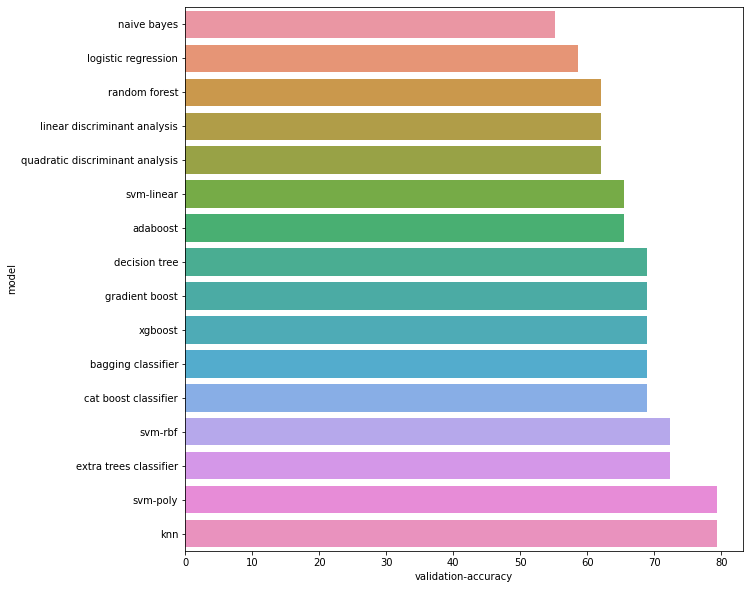

In [18]:
AutoLogger.get_metric_plot_classification(a,subset='validation',metric='accuracy')

## Artificial Neural Network

In [52]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import *
dl_model = Sequential() 

dl_model.add(Dense(256,  activation = 'relu' ,input_shape=([9]))) #input layer
dl_model.add(Dense(256,  activation = 'relu')) #hidden layer
dl_model.add(Dense(1,activation = 'sigmoid'))
dl_model.summary()
dl_model.compile(optimizer = 'adam' , loss = 'binary_crossentropy' ,metrics = ['accuracy','Precision','Recall','AUC'])

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 256)               2560      
                                                                 
 dense_7 (Dense)             (None, 256)               65792     
                                                                 
 dense_8 (Dense)             (None, 1)                 257       
                                                                 
Total params: 68,609
Trainable params: 68,609
Non-trainable params: 0
_________________________________________________________________


In [53]:
num_epochs = 20
history = dl_model.fit(x_train ,
                    y_train ,
                    epochs= num_epochs ,
                    steps_per_epoch=40,
                    validation_data=(x_test ,y_test))

Epoch 1/20
40/40 [==============================] - 1s 12ms/step - loss: 0.6471 - accuracy: 0.7038 - precision: 0.7862 - recall: 0.5700 - auc: 0.7576 - val_loss: 0.5907 - val_accuracy: 0.7440 - val_precision: 0.6867 - val_recall: 0.9048 - val_auc: 0.8618
Epoch 2/20
40/40 [==============================] - 0s 3ms/step - loss: 0.5165 - accuracy: 0.7848 - precision: 0.7968 - recall: 0.7602 - auc: 0.8706 - val_loss: 0.4729 - val_accuracy: 0.8080 - val_precision: 0.7910 - val_recall: 0.8413 - val_auc: 0.8785
Epoch 3/20
40/40 [==============================] - 0s 3ms/step - loss: 0.4129 - accuracy: 0.8557 - precision: 0.9138 - recall: 0.7910 - auc: 0.9019 - val_loss: 0.5089 - val_accuracy: 0.7520 - val_precision: 0.6818 - val_recall: 0.9524 - val_auc: 0.8866
Epoch 4/20
40/40 [==============================] - 0s 3ms/step - loss: 0.3565 - accuracy: 0.8734 - precision: 0.9080 - recall: 0.8229 - auc: 0.9262 - val_loss: 0.3720 - val_accuracy: 0.8640 - val_precision: 0.8966 - val_recall: 0.8254 -

In [54]:
a,b,c,d,e=dl_model.evaluate(x_test ,y_test)

4/4 [==============================] - 0s 0s/step - loss: 0.2296 - accuracy: 0.9360 - precision: 0.8873 - recall: 1.0000 - auc: 0.9686


In [55]:
dl_model.evaluate(x_train ,y_train)

12/12 [==============================] - 0s 2ms/step - loss: 0.1361 - accuracy: 0.9680 - precision: 0.9487 - recall: 0.9893 - auc: 0.9910


[0.13611054420471191,
 0.9679999947547913,
 0.9487179517745972,
 0.9893048405647278,
 0.9910115003585815]

### The ANN model produced 97% training accuracy and 94% validation accuracy. 

In [56]:
dl_model.save('breast cancer coimbra dataset-ANN.h5')

## Sample prediction

In [ ]:
print('enter the value for age')
f2=float(input())
print('enter the value for BMI')
f9=float(input())
print('enter the value for glucose')
f12=float(input())
print('enter the value for insulin')
f25=float(input())
print('enter the value for HOMA')
f26=float(input())
print('enter the value for Leptin')
f28=float(input())
print('enter the value for adiponectin')
f34=float(input())
print('enter the value for resistin')
f41=float(input())
print('enter the value for MCP-1')
f44=float(input())
inp=[[f2,f9,f12,f25,f26,f28,f34,f41,f44]]
out=dl_model.predict(inp)
o=out[0] #np.argmax(out,axis=1)
if o<0.5:
    print('negative')
else:
    print('positive')